## Predicting Insurance Premiums

In [411]:
#Initial imports
import pandas as pd
from path import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [412]:
# Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(126)

In [437]:
#Read in the insurance premium data
file_path = Path("./Resources/Updated_Project_Data.csv")
InsuranceData_df = pd.read_csv(file_path)
InsuranceData_df = InsuranceData_df.dropna()


In [464]:
# Define the features data...aka the insurance premium feature inputs
# right now I am just setting up the framework for the data inputs...for our project the X data will be all values other than the insurance premium

InsuranceData_df = InsuranceData_df[['County ','ISS', 'Years_In_Business', 'Number Of Trucks ', 'Yearly Premium']]
InsuranceData_df_encoded = pd.get_dummies(InsuranceData_df)
X = InsuranceData_df_encoded.drop(columns=['Yearly Premium'])
X
#X = X.values



,ISS,Years_In_Business,Number Of Trucks,County _High Risk,County _Normal
0,100.0,1.0,8.0,0,1
1,100.0,1.0,8.0,0,1
2,100.0,3.0,5.0,0,1
3,100.0,22.0,4.0,0,1
4,100.0,3.0,2.0,1,0
...,...,...,...,...,...
1941,1.0,2.0,1.0,1,0
1942,1.0,1.0,1.0,0,1
1943,1.0,0.0,1.0,0,1
1944,1.0,0.0,1.0,0,1


In [465]:
# Define the target Data....aka the insurance premium
# right now I am just setting up the framework for the data inputs...for our project the y data will be the insurance premium
y = InsuranceData_df_encoded['Yearly Premium'].values

### Scale the Data for the Neural Network Model

In [416]:
# Create training and testing datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [466]:
# Create the scaler instance
scaler = StandardScaler().fit(X)
# fit the scaler with the features data
#scaler.fit(X_train)
# Scale the features data
X = scaler.transform(X)





In [467]:
# Create a shallow, 1 hidden layer, neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=8, input_dim=5, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [468]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=100, verbose=0)

In [469]:
# Define the model - deep neural network with two layers
nn = Sequential()

# First hidden layer
nn.add(Dense(units=8, input_dim=5, activation="relu"))

# Second hidden layer
nn.add(Dense(units=8, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [470]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=100, verbose=0)

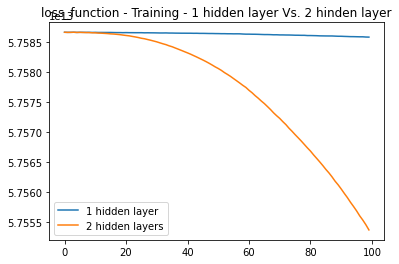

In [471]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 2 hinden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

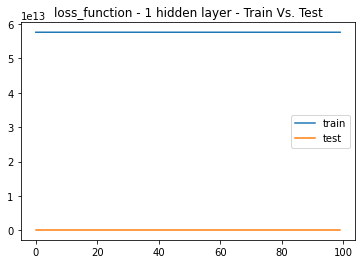

In [472]:
# Plot train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

## Neural Network Using PyTorch

In [481]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F

In [482]:
# create the input arrays for inputs an the target data
inputs_array = InsuranceData_df_encoded.drop(columns='Yearly Premium')
inputs_array = inputs_array.to_numpy()
targets_array = InsuranceData_df['Yearly Premium'].to_numpy()
inputs_array, targets_array
inputs = torch.Tensor(inputs_array)
targets = torch.Tensor(targets_array)
inputs.dtype, targets.dtype
dataset = TensorDataset(inputs, targets)

In [484]:
# create the % training and test data
val_percent = 0.15
val_size = int(inputs_array.shape[0] * val_percent)
train_size = inputs_array.shape[0] - val_size

In [485]:
# Use the random_split function to split dataset into 2 parts of the desired length
train_ds, val_ds = random_split(dataset,[train_size,val_size]) 

In [486]:
# create data loaders for training & validation
batch_size = 10
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [487]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[  1.,   0.,   1.,   0.,   1.],
        [ 86.,   2.,   9.,   0.,   1.],
        [ 95.,  17., 167.,   0.,   1.],
        [ 98.,   3.,   4.,   0.,   1.],
        [ 42.,   1.,   1.,   1.,   0.],
        [ 48.,  12.,   3.,   0.,   1.],
        [ 27.,  23., 103.,   1.,   0.],
        [ 76.,   1.,   7.,   0.,   1.],
        [ 98.,   1.,   5.,   0.,   1.],
        [ 21.,  19.,   2.,   0.,   1.]])
targets: tensor([  15000.,  137500., 2505500.,   70500.,   17500.,   47000., 1543500.,
         107500.,   87500.,   30000.])


In [488]:
# Creating the input and output sizes for the Linear Regression Model
input_size = InsuranceData_df_encoded.drop(columns='Yearly Premium').shape[1]
output_size = InsuranceData_df_encoded.shape[1] - input_size


In [489]:
# Insurance Model Function
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        #loss = F.mse_loss(out, targets)                          # fill this
        loss = F.l1_loss(out, targets) 
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
       # loss = F.mse_loss(out, targets)                           # fill this
        loss = F.l1_loss(out, targets) 
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [490]:
model = InsuranceModel()

In [491]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.4396, -0.0193, -0.2418, -0.1098, -0.3416]], requires_grad=True),
 Parameter containing:
 tensor([0.0843], requires_grad=True)]

In [492]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [493]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 494669.28125}


c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [494]:
epochs = 100
lr = 1
history1 = fit(epochs, lr, model, train_loader, val_loader)

c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 477098.4062
Epoch [40], val_loss: 476395.0312
Epoch [60], val_loss: 475845.2188
Epoch [80], val_loss: 475503.8125
Epoch [100], val_loss: 475313.7500


In [495]:
epochs = 100
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 475312.6562
Epoch [40], val_loss: 475311.3438
Epoch [60], val_loss: 475310.3125
Epoch [80], val_loss: 475309.3125
Epoch [100], val_loss: 475308.9688


In [496]:
epochs = 100
lr = 1e-2
history3 = fit(epochs, lr, model, train_loader, val_loader)

c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 475308.7812
Epoch [40], val_loss: 475305.3750
Epoch [60], val_loss: 475305.4688
Epoch [80], val_loss: 475304.9062
Epoch [100], val_loss: 475304.9688


In [497]:
val_loss = evaluate(model, val_loader)
val_loss

c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


{'val_loss': 475304.96875}

In [498]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)              # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [499]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([38.,  7.,  1.,  0.,  1.])
Target: tensor(13000.)
Prediction: tensor(30431.4473)


In [500]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([98.,  1.,  4.,  0.,  1.])
Target: tensor(70500.)
Prediction: tensor(40372.4688)
